These are ~ all the figures that I'll include in the article. They need to be more presentable and I still need to include more text. Criticisms and ideas welcome and encouraged.

-- Hugo

## The money that we all spend on retail

Before diving into the money we spend Thanksgiving through to Cyber Monday, lets look at how much money we collectively spend in retail each month from the end of 2013 up until now. Data is from [Ycharts](https://ycharts.com/indicators/retail_sales):

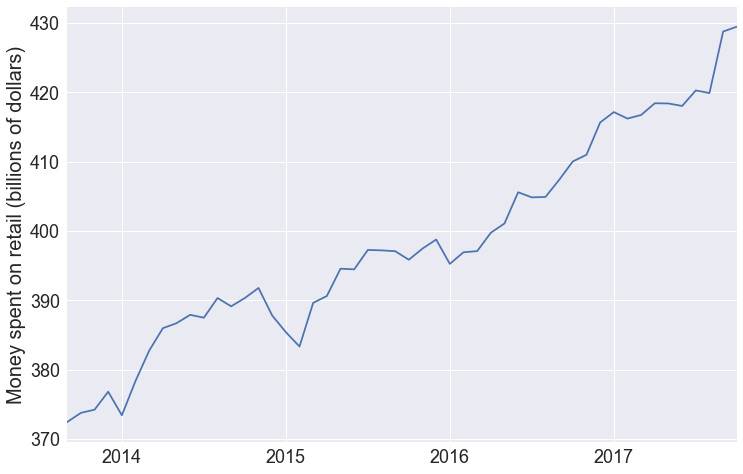

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
dd = pd.read_html('https://ycharts.com/indicators/retail_sales')
ds = pd.concat(dd[0:2]).drop([0])
ds['money'] = ds[1].apply(lambda x: float(x[:-1]))
ds = ds.iloc[::-1]
ds.reset_index(inplace=True)
ds.set_index(pd.date_range('2013-09-30', '2017-10-31', freq='M'), inplace=True)
ds['money'].plot(figsize=(12,8), fontsize=18);
plt.ylabel('Money spent on retail (billions of dollars)', size=20);


You can see that there may be peaks around November and December. Let's dive a bit deeper and see how much was spent in Holiday Season in 2016, defined as the period from Thanksgiving through to end of year.

## Spending in Holiday season

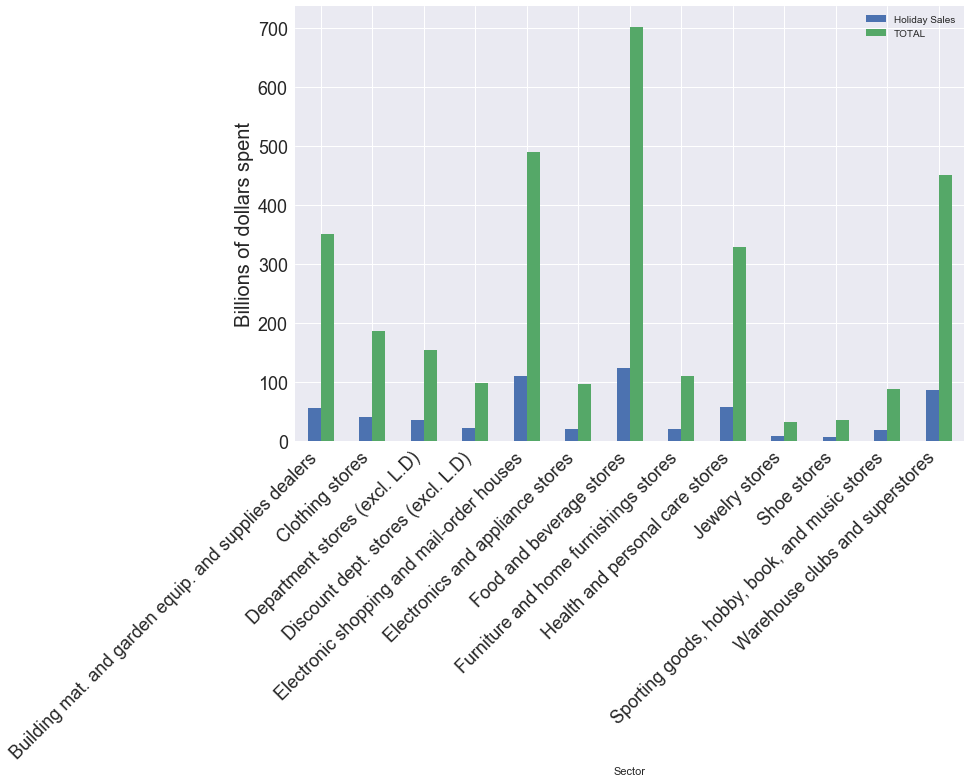

In [157]:
# data from here: https://nrf.com/media/press-releases/nrf-forecasts-holiday-sales-increase-between-36-and-4-percent
holiday_2016 = pd.read_csv('data/2016_hol.csv', sep='\t')
ax = holiday_2016.groupby(['Sector']).sum()[['Holiday Sales','TOTAL']].plot.bar( figsize=(12,8), fontsize=18);
plt.ylabel('Billions of dollars spent', size=20);
ax.set_xticklabels(holiday_2016.groupby(['Sector']).sum().index, rotation = 45, ha="right");

How much does holiday sales account for of total annual sales? See below across all sectors. The black dotted line is 10%, which is the percentage of days accounted for by from Thanksgiving until the end of the year.

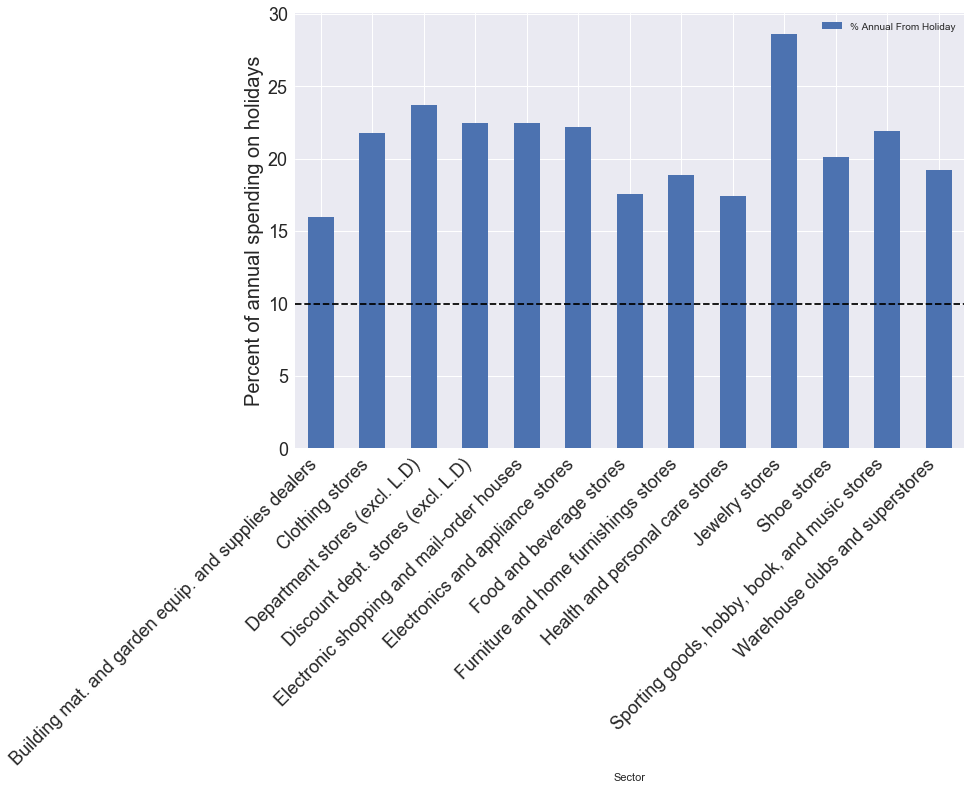

In [161]:
ax = holiday_2016.groupby(['Sector']).sum()[['% Annual From Holiday']].plot.bar( figsize=(12,8), fontsize=18);
plt.plot([-0.5, 14.5], [10, 10], "k--");
plt.ylabel('Percent of annual spending on holidays', size=20);
ax.set_xticklabels(holiday_2016.groupby(['Sector']).sum().index, rotation = 45, ha="right");

What about total? Total holiday sales accounted for 20% of annual sales in 2016, which is over 3% more than the amount of days it accounts for. 3% is 93.8 billion dollars.

In [162]:
holiday_2016['Holiday Sales'].sum()

612.1999999999999

In [163]:
holiday_2016['TOTAL'].sum()*0.03

93.84

The National Retail Federation announced [last month] that it expects holiday retail sales in November and December – excluding automobiles, gasoline and restaurants – to increase between 3.6 and 4 percent for a total of 678.75 billion to 682 billion dollars, up from 655.8 billion last year. From here: https://nrf.com/media/press-releases/nrf-forecasts-holiday-sales-increase-between-36-and-4-percent

## Spending over Thanksgiving weekend

Let's zoom into Thanksgiving weekend now. What days do people prefer to shop historically? [HBA] I need to get this data from NRF or to write it down and plot myself :P [/HBA]

<img src="img/thanksgiving_shopping_days.png",width=600>

Black Friday is the day! We're still waiting for the data to come through for 2017, but the NRF attempts to predict Thanksgiving weekend shopping each year by doing a nationwide survey. According to their survey, over a third of America will go shopping over the weekend.

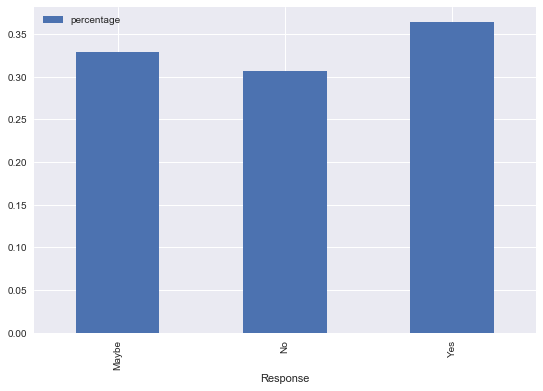

In [39]:
plan1 = pd.read_csv('data/plan_2017_1.csv').iloc[:3]
plan1.groupby(['Response']).sum().plot.bar(figsize=(9,6));

Of those who responded that they will go shopping, 66.3% said that the deals were too good to miss out on. Of those that won't go shopping, 52.4% said that they don't enjoy the experience. Even more telling is that, of those that said they wouldn't go shopping, when asked 'What Would Convince You To Shop Over Thanksgiving Weekend either in store or online?', 46.4% said 'Nothing would change my mind about shopping over Thanksgiving weekend'.

And which days do they plan to shop on?

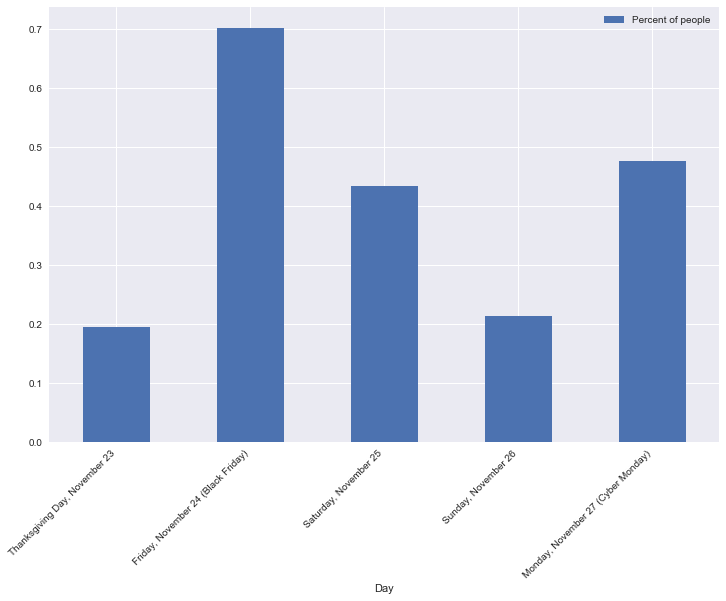

In [154]:
planx = plan2.groupby(['Day']).sum().reindex(["Thanksgiving Day, November 23","Friday, November 24 (Black Friday)", 
                                      "Saturday, November 25",
                                      "Sunday, November 26",
                                      "Monday, November 27 (Cyber Monday)"])
ax = planx.plot.bar(figsize=(12,8));
#plt.xticks(rotation=60)
ax.set_xticklabels(planx.index, rotation = 45, ha="right");

Notice that the bars add up to more than 100% (they actually add up to more than 200%). This is because many people will go shopping on several days. Black Friday is the most popular, with 70% of respondees shopping then.

In [59]:
planx['Percent of people'].sum()

2.0200443000000003

## Amount of money spent on Black Friday

Let's now delve into how much money Black Friday is worth. Data is from [Statistics Brain](https://www.statisticbrain.com/black-friday-yearly-spending/).

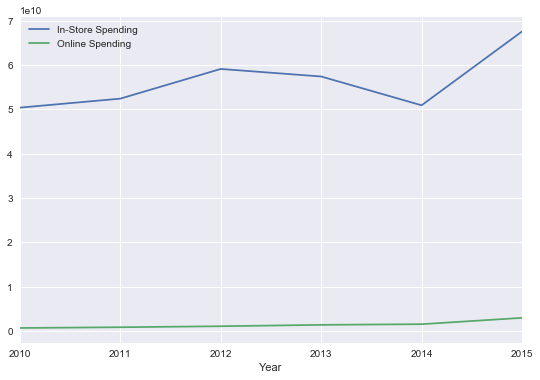

In [98]:
bf = pd.read_csv('data/bf_year.csv', sep='\t')
bf.head()
bf.groupby(['Year']).sum()[['In-Store Spending','Online Spending']].plot(figsize=(9,6));

Online and instore spending are still orders of magnitude apart so lets plot with a log y-axis (explain more here):

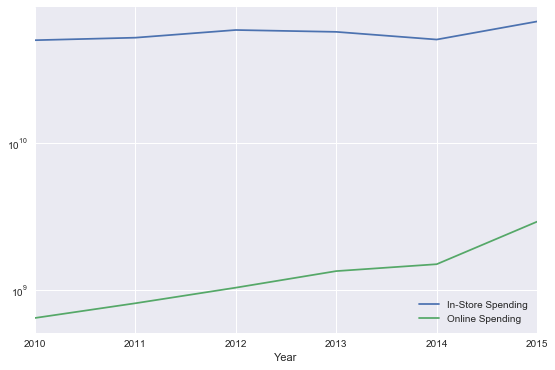

In [100]:
bf.groupby(['Year']).sum()[['In-Store Spending','Online Spending']].plot(figsize=(9,6), logy=True);

From the above, you can see that the amount spent online is 2 orders of magnitude less that spent instore. But that proportion may be increasing. Let's check out the percentage of Black Friday sales that were made online up until 2015:

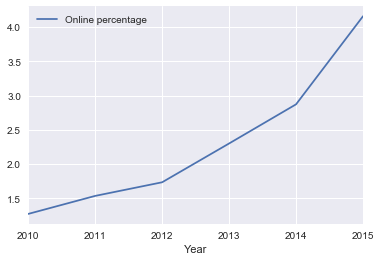

In [97]:
bf['Total Spending'] = bf['In-Store Spending'] + bf['Online Spending']
bf['Instore proportion'] = bf['In-Store Spending']/bf['Total Spending']
bf['Online percentage'] = bf['Online Spending']/bf['Total Spending']*100
bf.groupby(['Year']).sum()[['Online percentage']].plot();


Which online retailers get the most unique visitors?

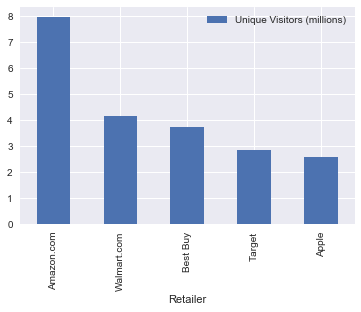

In [125]:
top_ret = pd.read_csv('data/top_vis_online_retailers.csv', sep='\t')
top_ret.groupby(['Retailer'])[['Unique Visitors (millions)']].sum().sort_values(['Unique Visitors (millions)'],
                                                                               ascending=False).plot.bar();

And which retailers spend the most money on Black Friday on the Google Keyword _Black Friday_?

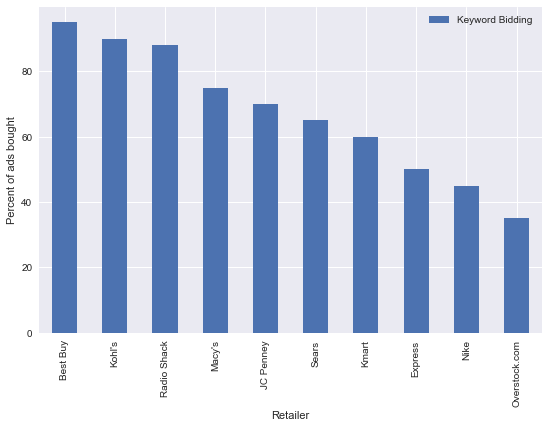

In [166]:
kb = pd.read_csv('data/keyword_bidding.csv', sep='\t').loc[:9]
kb
tt = kb.groupby(['Retailer'])[['Keyword Bidding']].sum().sort_values(['Keyword Bidding'],
                                                                               ascending=False)
tt.plot.bar(figsize=(9,6));
plt.ylabel('Percent of ads bought');

Note that, although Amazon gets the most unique visitors, they don't even make the top 10 for spending money on Google keywords. Business is that good!

___

In [101]:
# I also have data on Thanksgiving Day spending: not sure whether to use it

tgd = pd.read_csv('data/tgd_spending.csv', sep='\t')
tgd.head()

,Year,Spending Nov 1 – 26,Thanksgiving Day Spending
0,2014,"17,273,000,000","1,009,000,000"
1,2013,"16,096,000,000","766,000,000"
2,2012,"14,266,000,000","681,000,000"
3,2011,"12,737,000,000","479,000,000"
4,2010,"11,093,000,000","407,000,000"


In [ ]:
check this also: https://www.thebalance.com/what-is-black-friday-3305710